# 🧠 Credit Risk Scoring API with Explainability – Data Preprocessing Report

This notebook documents the **complete data preprocessing pipeline** for the project **“Credit Risk Scoring API with Explainability.”** The goal is to transform raw, messy loan applicant data into a clean and analysis-ready dataset suitable for model training, deployment, and explainability testing.

## 📍 Step 1: Importing Libraries
We start by importing the required Python libraries for data analysis, cleaning, and visualization.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## 📂 Step 2: Load the Raw (Corrupted) Dataset
We begin by loading the intentionally corrupted version of the dataset to simulate a real-world raw data scenario.

In [6]:
file_path = 'Financial_Data_Loan_Risk_2_corrupted.xlsx'
df = pd.read_excel(file_path)
print("Initial Shape:", df.shape)
df.head()

Initial Shape: (15200, 14)


,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,Risk Rating
0,19,Non-binary,Master's,Widowed,NaN,594,4830467,Auto,Self-employed,Excellent,0.559311,6271135,NaN,0
1,63,Female,Master's,Divorced,2309181.0,420,7817809,Business,NaN,Good,0.424428,4529880,0.0,0
2,18,Male,Master's,Divorced,1607766.0,539,6312845,Personal,Unemployed,Fair,0.566108,5364395,3.0,0
3,36,Mle,PhD,Divorced,1002529.0,501,7700597,Business,Employed,Poor,0.335310,4870636,1.0,0
4,67,Female,Master's,Widowed,1692015.0,693,4051443,Personal,Employed,Excellent,0.196246,8446090,0.0,0


## 🔍 Step 3: Exploratory Data Analysis (EDA)
Before cleaning, let’s check the extent of missing values, duplicates, and data type inconsistencies.


Missing Values per Column:
Age                        0
Gender                  3039
Education Level            0
Marital Status             0
Income                  1522
Credit Score               0
Loan Amount                0
Loan Purpose               0
Employment Status        875
Payment History            0
Debt-to-Income Ratio       0
Assets Value               0
Number of Dependents    2277
Risk Rating                0
dtype: int64

Duplicate Rows: 175


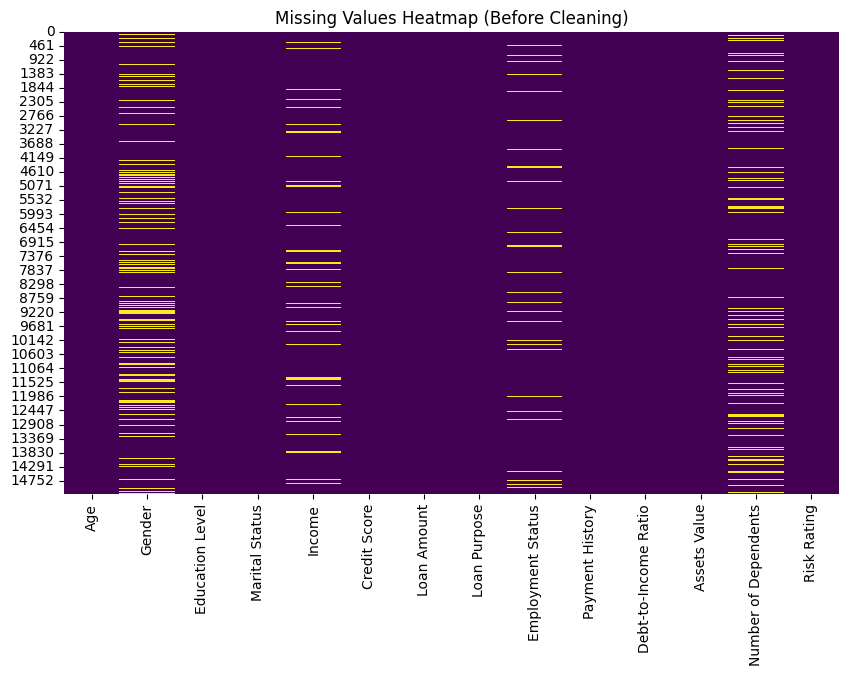

In [7]:
print("\nMissing Values per Column:")
print(df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

### 🔥 Missing Values Visualization

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (Before Cleaning)')
plt.show()

## 🧹 Step 4: Handling Missing Data
We fill missing categorical values with `'Unknown'` and numeric values with their median. This ensures the model won’t fail due to null values.

In [8]:
df['Gender'].fillna('Unknown', inplace=True)
df['Employment Status'].fillna('Unknown', inplace=True)
df['Income'].fillna(df['Income'].median(), inplace=True)
df['Number of Dependents'].fillna(df['Number of Dependents'].median(), inplace=True)

C:\Users\sk_ta\AppData\Local\Temp\ipykernel_24524\439322928.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna('Unknown', inplace=True)
C:\Users\sk_ta\AppData\Local\Temp\ipykernel_24524\439322928.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

## 🔁 Step 5: Removing Duplicates
Duplicate records can bias model training. We remove them for accuracy.

In [9]:
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (15025, 14)


## 🧩 Step 6: Fixing Categorical Inconsistencies
Common issues like inconsistent casing, extra spaces, and typos are cleaned up.

In [10]:
df['Marital Status'] = df['Marital Status'].astype(str).str.strip()
df['Education Level'] = df['Education Level'].astype(str).str.strip().str.title()
df['Gender'] = df['Gender'].astype(str).str.lower().replace({'mle': 'male', 'fmale': 'female'})
df['Loan Purpose'] = df['Loan Purpose'].replace({'UnknownPurpose': 'Other'})

## 💰 Step 7: Converting String-Formatted Numbers to Numeric
Some numeric columns (like credit score or income) contain symbols or text — these are stripped and converted.

In [11]:
df['Loan Amount'] = df['Loan Amount'].replace('[\$,]', '', regex=True)
df['Credit Score'] = df['Credit Score'].replace('score:', '', regex=True)
df['Assets Value'] = df['Assets Value'].replace(',', '', regex=True)

df['Loan Amount'] = pd.to_numeric(df['Loan Amount'], errors='coerce')
df['Credit Score'] = pd.to_numeric(df['Credit Score'], errors='coerce')
df['Assets Value'] = pd.to_numeric(df['Assets Value'], errors='coerce')

## 🚨 Step 8: Handling Outliers and Invalid Entries
Extreme values can distort models. We cap extreme income values and remove invalid ages.

In [12]:
df = df[df['Age'] > 0]
cap = df['Income'].quantile(0.99)
df.loc[df['Income'] > cap, 'Income'] = cap

## 🧠 Step 9: Encoding Categorical Variables
Machine learning models can’t read text — we convert categories into numeric codes.

In [13]:
categorical_cols = ['Gender', 'Education Level', 'Marital Status', 
                    'Loan Purpose', 'Employment Status', 'Payment History']

encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

## 📊 Step 10: Post-Cleaning Data Summary
After preprocessing, we verify that there are no missing values and all data types are consistent.

In [14]:
print("Data after cleaning:")
print(df.info())
print("\nMissing Values after cleaning:")
print(df.isnull().sum())

Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 14995 entries, 0 to 15199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   14995 non-null  int64  
 1   Gender                14995 non-null  int32  
 2   Education Level       14995 non-null  int32  
 3   Marital Status        14995 non-null  int32  
 4   Income                14995 non-null  float64
 5   Credit Score          14995 non-null  int64  
 6   Loan Amount           14995 non-null  int64  
 7   Loan Purpose          14995 non-null  int32  
 8   Employment Status     14995 non-null  int32  
 9   Payment History       14995 non-null  int32  
 10  Debt-to-Income Ratio  14995 non-null  float64
 11  Assets Value          14995 non-null  int64  
 12  Number of Dependents  14995 non-null  float64
 13  Risk Rating           14995 non-null  int64  
dtypes: float64(3), int32(6), int64(5)
memory usage: 1.4 MB

### 📈 Numeric Distribution Visualization (After Cleaning)

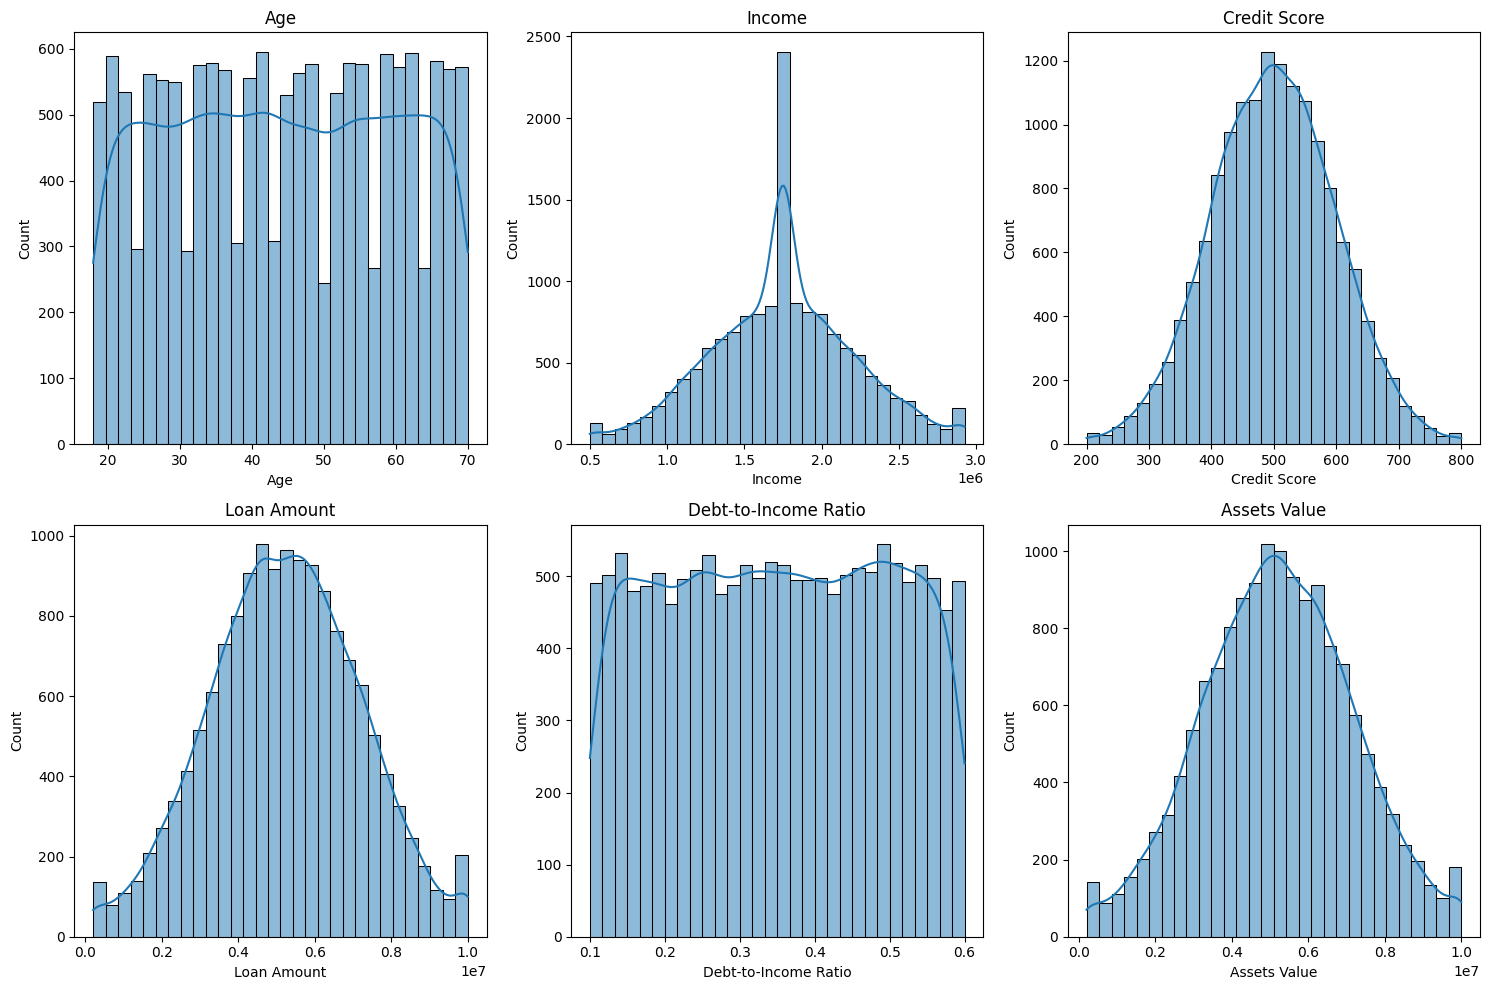

In [15]:
num_cols = ['Age', 'Income', 'Credit Score', 'Loan Amount', 'Debt-to-Income Ratio', 'Assets Value']
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

### 🔗 Correlation Heatmap

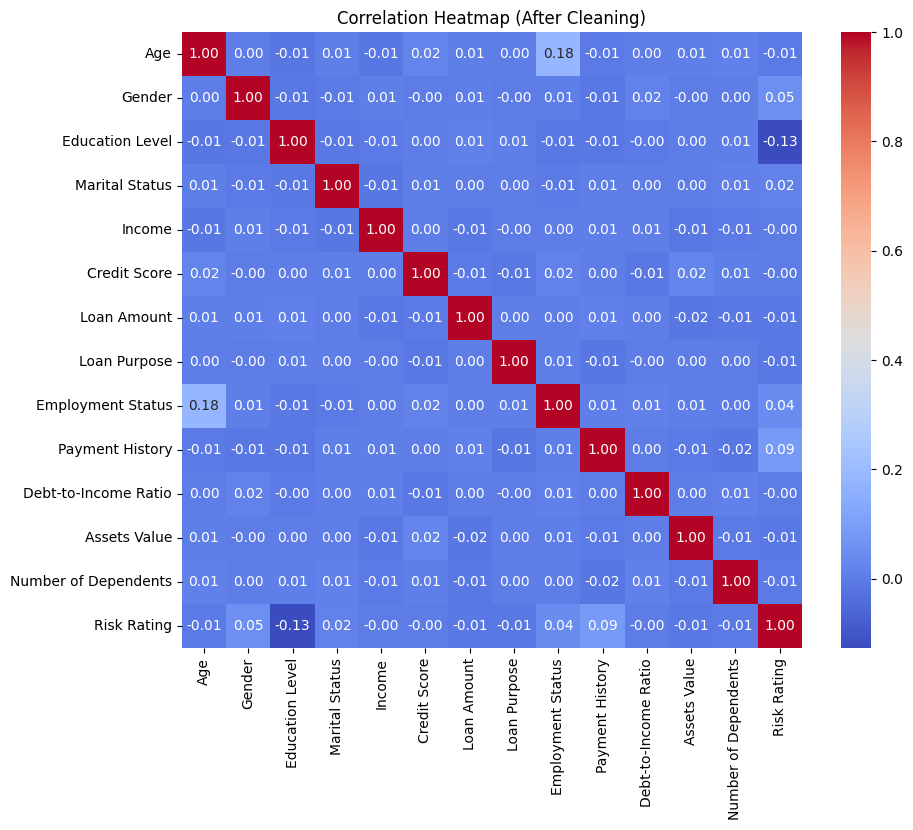

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (After Cleaning)')
plt.show()

- The diagonal line (red) is always 1.00, because every variable is perfectly correlated with itself.
- Most off-diagonal values are near 0, shown in dark blue, meaning:
- There is little to no multicollinearity among the features.
This visualization confirms that the dataset no longer contains highly correlated features. Most correlations hover around zero, indicating that the cleaned data is balanced and suitable for model training without the risk of multicollinearity.

## 🔄 Step 11: Comparison Before vs After Cleaning
We visualize how data completeness improved.

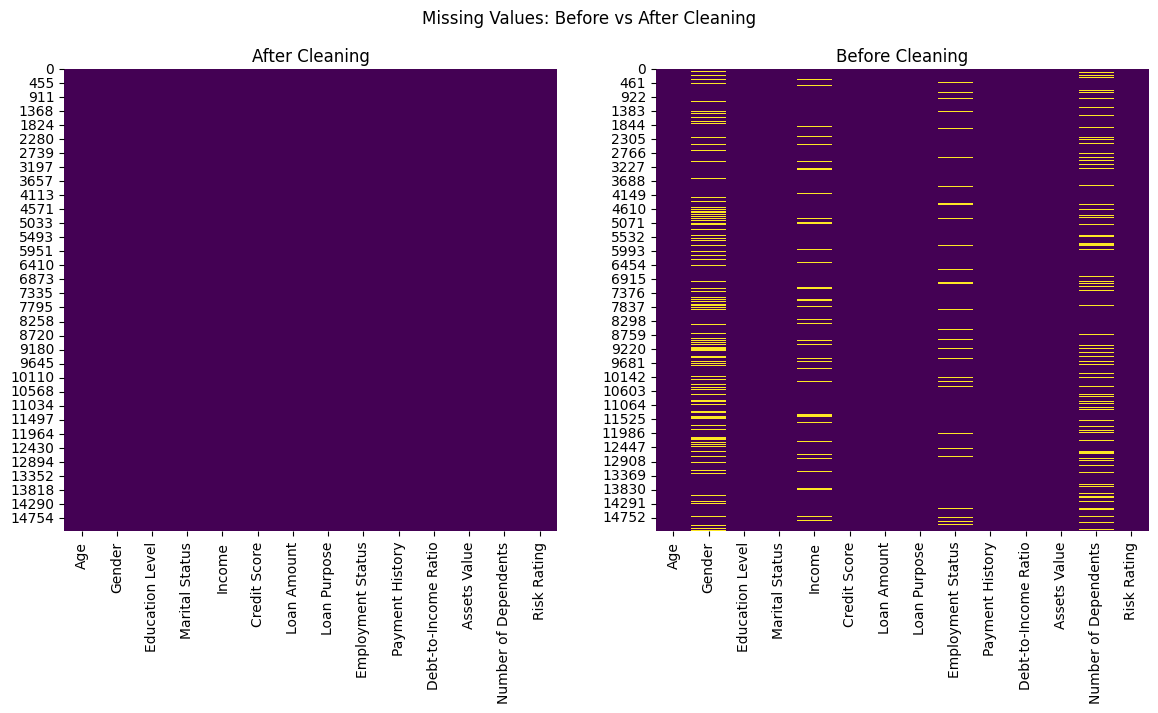

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', ax=axes[0])
axes[0].set_title('After Cleaning')

raw_df = pd.read_excel('Financial_Data_Loan_Risk_2_corrupted.xlsx')
sns.heatmap(raw_df.isnull(), cbar=False, cmap='viridis', ax=axes[1])
axes[1].set_title('Before Cleaning')
plt.suptitle('Missing Values: Before vs After Cleaning')
plt.show()

## 💾 Step 12: Save Cleaned Dataset
Finally, we save the cleaned data for model training.

In [18]:
output_path = 'Financial_Data_Loan_Risk_2_cleaned.xlsx'
df.to_excel(output_path, index=False)
print(f"Cleaned data saved to: {output_path}")

Cleaned data saved to: Financial_Data_Loan_Risk_2_cleaned.xlsx


## 🧩 Step 13: Ready for Explainable AI Integration
At this stage, the dataset can be fed into models (e.g., XGBoost, Random Forest, or Logistic Regression). Explainability layers such as **SHAP**, **LIME**, or **Feature Importance** can now be applied to interpret predictions.


## ✅ Summary & Next Steps
**We achieved:**
- Removed missing values, duplicates, and inconsistencies.
- Normalized numeric formats and handled outliers.
- Encoded categorical variables.
- Visualized transformations for presentation.

**Next:** Train the model → Deploy via FastAPI → Integrate Explainability module (e.g., SHAP) → Create API responses with human-readable risk insights.